In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras import layers

import os

# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers.core import Flatten

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading archives

In [69]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto_Final/artists_clean.csv')
df

,name,years,genre,nationality,paintings
0,Albrecht_Dürer,1471 - 1528,Northern Renaissance,German,328
1,Alfred_Sisley,1839 - 1899,Impressionism,"French,British",259
2,Amedeo_Modigliani,1884 - 1920,Expressionism,Italian,193
3,Andrei_Rublev,1360 - 1430,Byzantine Art,Russian,99
4,Andy_Warhol,1928 – 1987,Pop Art,American,181
5,Camille_Pissarro,1830 - 1903,"Impressionism,Post-Impressionism",French,91
6,Caravaggio,1571 - 1610,Baroque,Italian,55
7,Claude_Monet,1840 - 1926,Impressionism,French,73
8,Diego_Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,70
9,Diego_Velazquez,1599 - 1660,Baroque,Spanish,37


In [4]:
relative_path = '/content/drive/MyDrive/Proyecto_Final/pictures/resized/resized/'

In [5]:
top_20 = df.sort_values('paintings', ascending=False).head(20)
top_20.reset_index(inplace=True)
top_20.drop('index', axis=1, inplace=True)
top_20

,name,years,genre,nationality,paintings
0,Vincent_van_Gogh,1853 – 1890,Post-Impressionism,Dutch,877
1,Edgar_Degas,1834 - 1917,Impressionism,French,702
2,Pablo_Picasso,1881 - 1973,Cubism,Spanish,439
3,Pierre-Auguste_Renoir,1841 - 1919,Impressionism,French,336
4,Albrecht_Dürer,1471 - 1528,Northern Renaissance,German,328
5,Paul_Gauguin,1848 – 1903,"Symbolism,Post-Impressionism",French,311
6,Francisco_Goya,1746 - 1828,Romanticism,Spanish,291
7,Rembrandt,1606 - 1669,Baroque,Dutch,262
8,Alfred_Sisley,1839 - 1899,Impressionism,"French,British",259
9,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,255


In [44]:
df.sort_values('genre')

,name,years,genre,nationality,paintings
25,Jackson_Pollock,1912 – 1956,Abstract Expressionism,American,24
37,Peter_Paul_Rubens,1577 - 1640,Baroque,Flemish,141
9,Diego_Velazquez,1599 - 1660,Baroque,Spanish,37
6,Caravaggio,1571 - 1610,Baroque,Italian,55
42,Rembrandt,1606 - 1669,Baroque,Dutch,262
3,Andrei_Rublev,1360 - 1430,Byzantine Art,Russian,99
33,Pablo_Picasso,1881 - 1973,Cubism,Spanish,439
45,Sandro_Botticelli,1445 - 1510,Early Renaissance,Italian,164
2,Amedeo_Modigliani,1884 - 1920,Expressionism,Italian,193
47,Vasiliy_Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,88


## Functions

In [70]:
def jpg_to_dic(artist, painting_quantity=10):
    """
    This function returns a dictionary containing the arrays corresponding to 
    each painting of the artist.

    The image file name must be: <artist>_<number>.jpg
    e.g. Salvador_Dali_13.jpg
    """

    dic = dict()

    for paint_num in range(1, painting_quantity+1):
        painting = f'{relative_path}{artist}_{paint_num}.jpg'

        img = tf.keras.preprocessing.image.load_img(painting, 
        grayscale=False, 
        color_mode="rgb", 
        target_size=(180, 180), 
        interpolation="nearest"
        )
        array = tf.keras.preprocessing.image.img_to_array(img)

        dic[paint_num] = array
    print('\nDone!\n')
    return dic

In [71]:
def jpg_to_array(artists, painting_quantity=10):
    """
    This function returns a dictionary containing the arrays corresponding to 
    each painting of the artist.

    The image file name must be: <artist>_<number>.jpg
    e.g. Salvador_Dali_13.jpg
    """

    lst = list()

    for paint_num in range(1, painting_quantity+1):
        painting = f'{relative_path}{artist}_{paint_num}.jpg'

        img = tf.keras.preprocessing.image.load_img(painting, 
        grayscale=False, 
        color_mode="rgb", 
        target_size=(180, 180), 
        interpolation="nearest"
        )
        array = tf.keras.preprocessing.image.img_to_array(img)

        lst.append(array)
    print('\nDone!\n')
    return lst

In [72]:
def get_df(dictionary, artist, artist_number, size=97200):
  """
  This function takes the dictionary and an artist name and returns a pandas
  dataframe of the paintings array with the label in the last column
  """
  # df = pd.DataFrame() # Empty DataFrame
  DF = pd.DataFrame(dictionary[artist][1].reshape(1, size))
  for painting in dictionary[artist]: #range(1,4):#
    # print(painting)
    if painting != 10:
      DF_2 = pd.DataFrame(dictionary[artist][painting+1].reshape(1, size))
      DF = pd.concat([DF, DF_2])
    else:
      continue
  DF['Y'] = artist_number
  print('\nDone!\n')
  return DF

In [73]:
def painting_arrays(n):
  """
  This function returns a list of n number of paintings from the artists
  """
  arrays_list = list()
  # artist_array_dict = dict()
  for artist, qty in zip(artists, paint_qty):
    print(artist)
    # artist_array_dict[artist] = jpg_to_array(artist, n)
    arrays_list.append(jpg_to_array(artist, 10))
  print('\nDone!\n')
  return arrays_list#, artist_array_dict

In [ ]:
def jpg_to_array_from_folders(path, genre, painting_quantity=10):
    """
    This function returns a list containing the arrays corresponding to 
    each painting of the genre folder.

    The image file name must be: <artist>_<number>.jpg
    e.g. Salvador_Dali_13.jpg
    """

    lst = list()

    for paint_num in range(1, painting_quantity+1):
        painting = f'{path}{genre}_{paint_num}.jpg'

        img = tf.keras.preprocessing.image.load_img(painting, 
        grayscale=False, 
        color_mode="rgb", 
        target_size=(180, 180), 
        interpolation="nearest"
        )
        array = tf.keras.preprocessing.image.img_to_array(img)

        lst.append(array)
    print('\nDone!\n')
    return lst

In [115]:
def arrays_from_genre(path, genre, genre_dict=artist_per_genre, painting_quantity=10, target_size=(180, 180)):
  """
  This function returns a list containing the arrays of images from a path.
  The folders contains artists folders as this:

  images:
    genre_1:
      artist_1:
        img_1.jpg
        img_2.jpg
        img_3.jpg
      artist_2:
        img_1.jpg
        img_2.jpg
        img_3.jpg
    genre_2:
      artist_1:
        img_1.jpg
        img_2.jpg
        img_3.jpg
      artist_2:
        img_1.jpg
        img_2.jpg
        img_3.jpg
  """
  arrays_genre = list()

  list_artists = artist_per_genre[genre] # list of artists
  # iterate over list of artists
  for artist in list_artists:
    print(f' Currently in {genre}, {artist} ')
    for paint_num in range(1, painting_quantity+1):
      
      painting = f'{path}/{genre}/{artist}/{artist}_{paint_num}.jpg'

      img = tf.keras.preprocessing.image.load_img(painting, 
      grayscale=False, 
      color_mode="rgb", 
      target_size=target_size, 
      interpolation="nearest"
      )
      array = tf.keras.preprocessing.image.img_to_array(img)
      arrays_genre.append(array)

  
  return arrays_genre, print('\nDone!\n')

In [82]:
path = '/content/drive/MyDrive/Proyecto_Final/pictures/images/images'
genre = 'Expression'
artist = 'Amedeo_Modigliani'
paint_num = 
painting = f'{path}/{genre}/{artist}/{artist}_{paint_num}.jpg'

img = tf.keras.preprocessing.image.load_img(painting, 
grayscale=False, 
color_mode="rgb", 
target_size=target_size, 
interpolation="nearest"
)

15

## Data processing

In [10]:
# data = pd.DataFrame()
# for num, artist in enumerate(artists):
#   print(num, artist)
#   data = pd.concat([data, get_df(paintings_dict, artist, num)])

In [11]:
# artists = list(df['name'])
# artists.remove('Diego_Velazquez')
# paint_qty = list(df['paintings'])
# paint_qty.remove(37)
# print(paint_qty)
# len(artists) == len(paint_qty)

In [74]:
artists = list(top_20['name'])
# artists.remove('Diego_Velazquez')
paint_qty = list(top_20['paintings'])
# paint_qty.remove(37)
print(paint_qty)
len(artists) == len(paint_qty)

[877, 702, 439, 336, 328, 311, 291, 262, 259, 255, 239, 194, 193, 188, 186, 181, 171, 164, 143, 141]


True

## Get n paintings from each artist of each genre

In [86]:
list(artist_per_genre.keys())

['Baroque',
 'Expressionism',
 'H_Renaissance',
 'Impressionism',
 'N_Renaissance',
 'Post_Impressionism',
 'Primitivism',
 'Realism',
 'Romanticism',
 'Surrealism',
 'Symbolism']

In [165]:
# dict of artist in each folder
# Post_Impressionism/Vincent_van_Gogh/Vincent_van_Gogh_1.jpg



artist_per_genre = {
    'Abstract':['Paul_Klee',
                'Vasiliy_Kandinskiy'],
    'Baroque':['Caravaggio', 
               'Peter_Paul_Rubens', 
               'Rembrandt'],
    'Expresionism':['Amedeo_Modigliani', 
                    'Edvard_Munch',
                    'Marc_Chagall'],
    'H_Renaissance':['Leonardo_da_Vinci',
                     'Michelangelo',
                     'Raphael',
                     'Titian'],
    'Impressionism':['Alfred_Sisley',
                     'Claude_Monet',
                     'Edgar_Degas',
                     'Pierre-Auguste_Renoir'],
    'N_Renaissance':['Albrecht_Dürer',
                     'Hieronymus_Bosch',
                     'Jan_van_Eyck',
                     'Pieter_Bruegel'],
    'Post_Impressionism':['Georges_Seurat',
                          'Henri_Rousseau',
                          'Henri_de_Toulouse-Lautrec',
                          'Paul_Cezanne',
                          'Vincent_van_Gogh'],
    'Realism':['Edouard_Manet',
               'Gustave_Courbet'],
    'Romanticism':['Eugene_Delacroix',
                   'Francisco_Goya',
                   'William_Turner'],
    'Surrealism':['Frida_Kahlo',
                  'Joan_Miro',
                  'Rene_Magritte',
                  'Salvador_Dali'],
    'Symbolism':['Gustav_Klimt',
                 'Mikhail_Vrubel',
                 'Paul_Gauguin']
}

In [100]:
# Cleaning Albrecht Dürer files name

import os
# path = '/content/drive/MyDrive/Proyecto_Final/pictures/images/images/N_Renaissance/Albrecht_Dürer/'
for i in range(1, 329):
  from_ = f'/content/drive/MyDrive/Proyecto_Final/pictures/images/images/N_Renaissance/Albrecht_Dürer/Albrecht_Du╠Иrer_{i}.jpg'
  to_ = f'/content/drive/MyDrive/Proyecto_Final/pictures/images/images/N_Renaissance/Albrecht_Dürer/Albrecht_Dürer_{i}.jpg'
  os.rename(from_, to_)

In [166]:
array_list = list()
path = '/content/drive/MyDrive/Proyecto_Final/pictures/images/images'
for genre in artist_per_genre.keys():
  array_list.append(arrays_from_genre(path,genre))
len(array_list)

 Currently in Abstract, Paul_Klee 
 Currently in Abstract, Vasiliy_Kandinskiy 

Done!
 Currently in Baroque, Caravaggio 
 Currently in Baroque, Peter_Paul_Rubens 
 Currently in Baroque, Rembrandt 

Done!
 Currently in Expresionism, Amedeo_Modigliani 
 Currently in Expresionism, Edvard_Munch 
 Currently in Expresionism, Marc_Chagall 

Done!
 Currently in H_Renaissance, Leonardo_da_Vinci 
 Currently in H_Renaissance, Michelangelo 
 Currently in H_Renaissance, Raphael 
 Currently in H_Renaissance, Titian 

Done!
 Currently in Impressionism, Alfred_Sisley 
 Currently in Impressionism, Claude_Monet 
 Currently in Impressionism, Edgar_Degas 
 Currently in Impressionism, Pierre-Auguste_Renoir 

Done!
 Currently in N_Renaissance, Albrecht_Dürer 
 Currently in N_Renaissance, Hieronymus_Bosch 
 Currently in N_Renaissance, Jan_van_Eyck 
 Currently in N_Renaissance, Pieter_Bruegel 

Done!
 Currently in Post_Impressionism, Georges_Seurat 
 Currently in Post_Impressionism, Henri_Rousseau 
 Currentl

11

In [168]:
len(array_list[0]) 

# Array list dimensions: (genre, artist, painting)

20

### Get n paintings from each artist

In [ ]:
# Get 10 paintings from each artist

arrays_list = list()
# artist_array_dict = dict()
for artist, qty in zip(artists, paint_qty):
  print(artist)
  # artist_array_dict[artist] = jpg_to_array(artist, 10)
  arrays_list.append(jpg_to_array(artist, 20)) # 10

print('done')

### Array list to array of arrays

In [112]:
# jpg_to_array()

### Former

In [ ]:
# Get 20 paintings from each genre

arrays_list = list()

for artist, qty in zip(artists, paint_qty):
  print(artist)
  # artist_array_dict[artist] = jpg_to_array(artist, 10)
  arrays_list.append(jpg_to_array(artist, 20)) # 10

print('done')

In [113]:
# Former
paintings_list = list()

for artist in arrays_list:
  for painting in artist:
    paintings_list.append(painting)

data_array = np.array(paintings_list)
data_array.shape

(400, 180, 180, 3)

In [123]:
len(array_list), len(array_list[0])

(11, 30)

### Actual

In [169]:
paintings_list = list()

for genre in array_list:
  for artist in genre:
    paintings_list.append(artist)

data_array = np.array(paintings_list)
data_array.shape

(370, 180, 180, 3)

## Data Augmentation

In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=180)

In [18]:
samples = data_array
samples.shape

(400, 180, 180, 3)

In [19]:
it = datagen.flow(samples, batch_size=1)

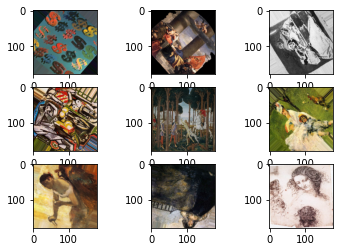

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

In [20]:
type(it)

keras.preprocessing.image.NumpyArrayIterator

In [ ]:
# np.array(it)

In [ ]:
# train_ds := images loaded with keras.preprocessing.image_dataset_from_directory

augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

## List of numbers correspondig to the artist of each painting in the array

In [34]:
i = 0
num_list = []
artists_quantity = 20
paintings_per_artist = 20
while i <= artists_quantity-1:
  for num in range(0, paintings_per_artist):
  # print(num)
    num_list.append(i)
  i += 1
# num_list[:21]
len(num_list)

400

In [ ]:
num_list[-1]

19

## List of genres for labels

In [147]:
artist_per_genre['Baroque']

['Caravaggio', 'Peter_Paul_Rubens', 'Rembrandt']

In [149]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
genres = list(artist_per_genre.keys())
labels_codified = []
labels = []

for code, actual_genre in enumerate(genres):
  for i in range(1, len(artist_per_genre[actual_genre])+1):
    for j in range(10):
      labels.append(actual_genre)
      labels_codified.append(code)
len(labels_codified)
list(zip(labels, labels_codified))

 ## Train/Test data split

In [172]:
data_array.shape

(370, 180, 180, 3)

In [173]:
np.array(labels_codified).shape

(370,)

In [174]:
X = data_array
y = np.array(labels_codified) #(num_list)

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((277, 180, 180, 3), (93, 180, 180, 3), (277,), (93,))

## RGB to Grayscale

In [175]:
# Uncoment [:,:,:,0] to transform RGB to GS
train_images = x_train#[:,:,:,0]
test_images = x_test#[:,:,:,0]

train_labels = y_train
test_labels = y_test
# type(train_list[0])

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((277, 180, 180, 3), (93, 180, 180, 3), (277,), (93,))

## Shapes of the train/test data & Reshape

In [176]:
type(train_images[0])
train_images.shape

n_train = train_images.shape[0]
n_test = test_images.shape[0]

print(n_train, n_test)

277 93


In [177]:
input_shape = (180, 180, 3)

train_images = train_images.reshape(n_train, 180, 180, 3)
test_images = test_images.reshape(n_test, 180, 180, 3)
# Confirming the type of data
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Reescale the pixels between 0 and 255
train_images /= 255
test_images /= 255

## Dense ANN

In [178]:
# train a NN

model = keras.Sequential([
    layers.Flatten(),                      
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(49, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
              )

model.fit(train_images, train_labels, epochs=30, batch_size=32)

Epoch 1/50
9/9 [==============================] - 3s 278ms/step - loss: 96.0167 - accuracy: 0.0758
Epoch 2/50
9/9 [==============================] - 2s 275ms/step - loss: 49.5103 - accuracy: 0.0939
Epoch 3/50
9/9 [==============================] - 2s 275ms/step - loss: 21.2402 - accuracy: 0.1300
Epoch 4/50
9/9 [==============================] - 2s 273ms/step - loss: 15.2608 - accuracy: 0.1516
Epoch 5/50
9/9 [==============================] - 2s 278ms/step - loss: 6.9726 - accuracy: 0.2058
Epoch 6/50
9/9 [==============================] - 3s 279ms/step - loss: 4.7802 - accuracy: 0.2635
Epoch 7/50
9/9 [==============================] - 2s 275ms/step - loss: 4.3477 - accuracy: 0.2419
Epoch 8/50
9/9 [==============================] - 2s 276ms/step - loss: 4.2317 - accuracy: 0.3213
Epoch 9/50
9/9 [==============================] - 3s 279ms/step - loss: 3.8310 - accuracy: 0.3718
Epoch 10/50
9/9 [==============================] - 3s 283ms/step - loss: 2.8154 - accuracy: 0.4729
Epoch 11/50
9/9

In [179]:
model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 103ms/step - loss: 4.1349 - accuracy: 0.1183


[4.134913921356201, 0.11827956885099411]

## Convolutional Neural Network (simple)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(180, 3, activation='relu', input_shape=input_shape), 
    # strides := velocity of the smaller grid
    layers.Conv2D(90, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(49, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
              )

model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
12/12 [==============================] - 35s 2s/step - loss: 20.4096 - accuracy: 0.0245
Epoch 2/10
12/12 [==============================] - 15s 1s/step - loss: 3.8894 - accuracy: 0.0954
Epoch 3/10
12/12 [==============================] - 15s 1s/step - loss: 3.7323 - accuracy: 0.2016
Epoch 4/10
12/12 [==============================] - 15s 1s/step - loss: 3.4462 - accuracy: 0.2262
Epoch 5/10
12/12 [==============================] - 15s 1s/step - loss: 2.4444 - accuracy: 0.4741
Epoch 6/10
12/12 [==============================] - 15s 1s/step - loss: 1.0119 - accuracy: 0.8283
Epoch 7/10
12/12 [==============================] - 15s 1s/step - loss: 0.3686 - accuracy: 0.9319
Epoch 8/10
12/12 [==============================] - 15s 1s/step - loss: 0.1312 - accuracy: 0.9782
Epoch 9/10
12/12 [==============================] - 15s 1s/step - loss: 0.0750 - accuracy: 0.9973
Epoch 10/10
12/12 [==============================] - 15s 1s/step - loss: 0.0207 - accuracy: 1.0000


In [ ]:
model.evaluate(test_images, test_labels)

4/4 [==============================] - 3s 865ms/step - loss: 12.5778 - accuracy: 0.0325


[12.577753067016602, 0.03252032399177551]

## Convolutional Neural Network (custom)

In [161]:
model = keras.Sequential([
    layers.AveragePooling2D(6, 3, input_shape=input_shape), 
    # strides := velocity of the smaller grid
    layers.Conv2D(180*2, 3, activation='relu'),
    layers.Conv2D(90*2, 3, activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(360*2, activation='relu'),
    layers.Dense(49, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
              )

model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
9/9 [==============================] - 69s 7s/step - loss: 4.5830 - accuracy: 0.0903
Epoch 2/20
9/9 [==============================] - 71s 8s/step - loss: 2.5703 - accuracy: 0.1444
Epoch 3/20
9/9 [==============================] - 67s 7s/step - loss: 2.4064 - accuracy: 0.1264
Epoch 4/20
9/9 [==============================] - 67s 7s/step - loss: 2.2982 - accuracy: 0.1805
Epoch 5/20
9/9 [==============================] - 67s 7s/step - loss: 2.1845 - accuracy: 0.2274
Epoch 6/20
9/9 [==============================] - 67s 7s/step - loss: 2.1168 - accuracy: 0.2238
Epoch 7/20
9/9 [==============================] - 67s 7s/step - loss: 1.9591 - accuracy: 0.3105
Epoch 8/20
9/9 [==============================] - 67s 7s/step - loss: 1.6711 - accuracy: 0.4838
Epoch 9/20
9/9 [==============================] - 67s 7s/step - loss: 1.3754 - accuracy: 0.5632
Epoch 10/20
9/9 [==============================] - 68s 7s/step - loss: 1.1205 - accuracy: 0.6498
Epoch 11/20
9/9 [======================

In [162]:
model.evaluate(test_images, test_labels)

3/3 [==============================] - 7s 2s/step - loss: 3.8171 - accuracy: 0.3011


[3.8170742988586426, 0.301075279712677]

## CNN + DA

In [39]:
model = keras.Sequential([
    layers.AveragePooling2D(6, 3, input_shape=input_shape), 
    # strides := velocity of the smaller grid
    layers.Conv2D(180*2, 3, activation='relu'),
    layers.Conv2D(90*2, 3, activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(360*2, activation='relu'),
    layers.Dense(49, activation='softmax')
])

In [42]:
x_train = train_images
y_train = train_labels

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)
# fits the model on batches with real-time data augmentation:
model.compile()
model.fit(datagen.flow(x_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(x_train) / 32, epochs=10)

Epoch 1/10


ValueError: ignored

## Keras NN

In [49]:
image_size = (180, 180)
batch_size = 10

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Proyecto_Final/pictures/images/images',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Proyecto_Final/pictures/images/images',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 6648 files belonging to 11 classes.
Using 5319 files for training.
Found 6648 files belonging to 11 classes.
Using 1329 files for validation.


In [61]:
#viewing the df
genre = df.sort_values('genre')
genre

,name,years,genre,nationality,paintings
25,Jackson_Pollock,1912 – 1956,Abstract Expressionism,American,24
37,Peter_Paul_Rubens,1577 - 1640,Baroque,Flemish,141
9,Diego_Velazquez,1599 - 1660,Baroque,Spanish,37
6,Caravaggio,1571 - 1610,Baroque,Italian,55
42,Rembrandt,1606 - 1669,Baroque,Dutch,262
3,Andrei_Rublev,1360 - 1430,Byzantine Art,Russian,99
33,Pablo_Picasso,1881 - 1973,Cubism,Spanish,439
45,Sandro_Botticelli,1445 - 1510,Early Renaissance,Italian,164
2,Amedeo_Modigliani,1884 - 1920,Expressionism,Italian,193
47,Vasiliy_Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,88


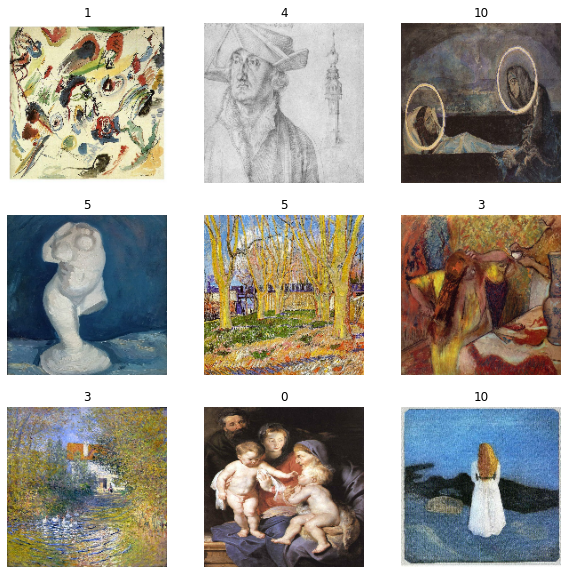

In [60]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [62]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

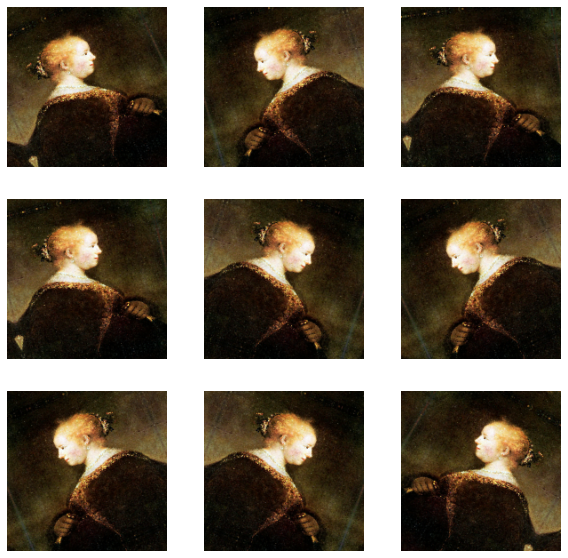

In [63]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [64]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [65]:
train_ds = train_ds.prefetch(buffer_size=20)
val_ds = val_ds.prefetch(buffer_size=20)

In [66]:
from keras.utils.vis_utils import plot_model

In [67]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [16, 32, 64, 64]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
# tf.keras.utils.plot_model(model, show_shapes=True)

In [68]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/10
  5/532 [..............................] - ETA: 9:11 - loss: -2.5009 - accuracy: 0.0600

KeyboardInterrupt: ignored

In [31]:
train_images = train_ds
train_labels = val_ds

model = keras.Sequential([
    layers.AveragePooling2D(6, 3, input_shape=(180, 180, 1)), 
    # strides := velocity of the smaller grid
    layers.Conv2D(180*2, 3, activation='relu'),
    layers.Conv2D(90*2, 3, activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(360*2, activation='relu'),
    layers.Dense(49, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
              )

model.fit(train_images, validation_data=train_labels, epochs=20, batch_size=32, )

Epoch 1/20


ValueError: ignored

In [ ]:
model.evaluate(test_images, test_labels)